In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('resource/mpg.csv')

In [3]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


#### loc과 iloc으로 mpg 데이터에서 데이터 추출하기

In [4]:
df.loc[1:5, ['cyl', 'cty', 'hwy']]

,cyl,cty,hwy
1,4,21,29
2,4,20,31
3,4,21,30
4,6,16,26
5,6,18,26


In [11]:
df.loc[[0,1,2,3,4,5], ['displ','category']]

,displ,category
0,1.8,compact
1,1.8,compact
2,2.0,compact
3,2.0,compact
4,2.8,compact
5,2.8,compact


In [13]:
df.loc[[0,15,42,77,201,222], ['manufacturer', 'model']]

,manufacturer,model
0,audi,a4
15,audi,a6 quattro
42,dodge,caravan 2wd
77,ford,explorer 4wd
201,toyota,toyota tacoma 4wd
222,volkswagen,new beetle


In [15]:
df.loc[5:40:3, ['cty']]

,cty
5,18
8,16
11,15
14,15
17,16
20,14
23,16
26,15
29,11
32,19


In [18]:
df.loc[range(1,10,2), ['trans']]

,trans
1,manual(m5)
3,auto(av)
5,manual(m5)
7,manual(m5)
9,manual(m6)


In [19]:
new_df = df.loc[[0,4,17,80,90,101,150], ['manufacturer', 'model', 'displ', 'category']]

In [20]:
new_df

,manufacturer,model,displ,category
0,audi,a4,1.8,compact
4,audi,a4,2.8,compact
17,audi,a6 quattro,4.2,midsize
80,ford,explorer 4wd,4.0,suv
90,ford,mustang,3.8,subcompact
101,honda,civic,1.6,subcompact
150,nissan,pathfinder 4wd,3.3,suv


In [21]:
new_df.iloc[1:3]

,manufacturer,model,displ,category
4,audi,a4,2.8,compact
17,audi,a6 quattro,4.2,midsize


In [22]:
new_df.iloc[1:3,2:4] # iloc은 칼럼 추출 시에 변수명으로 추출이 불가하다(?)

,displ,category
4,2.8,compact
17,4.2,midsize


In [24]:
new_df.iloc[1:5, [0,3]]

,manufacturer,category
4,audi,compact
17,audi,midsize
80,ford,suv
90,ford,subcompact


In [28]:
new_df.iloc[:,range(3)]

,manufacturer,model,displ
0,audi,a4,1.8
4,audi,a4,2.8
17,audi,a6 quattro,4.2
80,ford,explorer 4wd,4.0
90,ford,mustang,3.8
101,honda,civic,1.6
150,nissan,pathfinder 4wd,3.3


In [30]:
df.iloc[50:100:10, 0:7:3]

,manufacturer,year,drv
50,dodge,1999,4
60,dodge,2008,4
70,dodge,1999,4
80,ford,2008,4
90,ford,1999,r


#### mpg 데이터의 칼럼별 이상치 살펴보기

##### displ col

In [42]:
import seaborn as sns
import numpy as np

In [33]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


<AxesSubplot:ylabel='displ'>

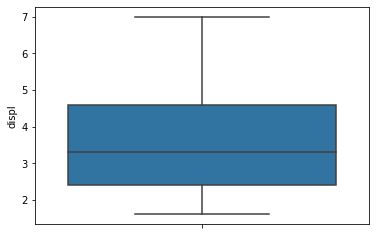

In [35]:
sns.boxplot(data = df, y = 'displ')

In [39]:
displ25 = df['displ'].quantile(.25)
displ75 = df['displ'].quantile(.75)
d_iqr = displ75 - displ25
print("displ25 : ", displ25)
print("displ75 : ", displ75)
print("d_iqr : ", d_iqr)

displ25 :  2.4
displ75 :  4.6
d_iqr :  2.1999999999999997


In [40]:
print("상한 : ", displ75 + d_iqr*1.5)
print("하한 : ", displ25 - d_iqr*1.5)

상한 :  7.8999999999999995
하한 :  -0.8999999999999999


In [44]:
df['displ'] = np.where((df['displ']<-0.899999) | (df['displ']>7.899999), np.nan, df['displ'])

In [46]:
df['displ'].isna().sum()

0

displ 칼럼에는 이상치가 없다!

##### cty col

<AxesSubplot:ylabel='cty'>

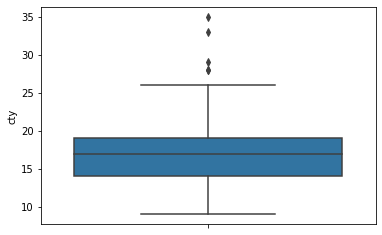

In [47]:
sns.boxplot(data = df, y = 'cty')

이상치가 상한 위로 4개 존재할 것으로 예상됨

In [48]:
cty25 = df['cty'].quantile(.25)
cty75 = df['cty'].quantile(.75)
c_iqr = cty75 - cty25
print("cty25 : ", cty25)
print("cty75 : ", cty75)
print("c_iqr : ", c_iqr)

cty25 :  14.0
cty75 :  19.0
c_iqr :  5.0


In [49]:
print("상한 : ", cty75 + c_iqr*1.5)
print("하한 : ", cty25 - c_iqr*1.5)

상한 :  26.5
하한 :  6.5


In [70]:
df['cty'] = np.where((df['cty']<6.5) | (df['cty']>26.5), np.nan, df['cty'])

In [71]:
df['cty'].isna().sum()

5

cty 칼럼에는 이상치가 5개 있다!